<a href="https://colab.research.google.com/github/BachiLi/redner/blob/master/tutorials/hello_redner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [986]:
import os
import glob
import pyredner # pyredner will be the main Python module we import for redner.
import torch # We also import PyTorch
import urllib
import zipfile
import random
import torchvision
import math
from typing import Optional, List

### def setPosition

In [1003]:
def setPosition(objects: List[pyredner.Object] = None, 
                position: List[List[float]] = None,
                set_random_pos: bool = True):
    """
    Params:
    =======
    objects -> List[pyredner.Object]
        set multiple objects' position

    position -> List[List[float, float, float]]
        the shift on x axis, y axis and z axis respectively
    
    Return:
    newObjects -> List[pyredner.Object]
    =======
    """
    
    newObjects = []

    if objects is None:
        raise ValueError("missing required parameter")
    
    if set_random_pos:
        for object in objects:
            newObject = object
            newObject.vertices += torch.tensor([
                random.uniform(-0.9, 0.9), 
                random.uniform(-0.9, 0.9), 
                random.uniform(-0.9, 0.9)])
            
            newObjects.append(newObject)
    else:
        for idx, object in enumerate(objects):
            newObject = object
            d_x, d_y, d_z = position[idx]
            newObject.vertices += torch.tensor([d_x, d_z, d_y])

            newObjects.append(newObject)

    return newObjects

### def setScale

In [988]:
def setScale(objects: List[pyredner.Object] = None,
             scales: List[float] = None,
             set_random_scale: bool = True):
    """
    Params:
    =======
    objects -> List[pyredner.Object]
        set multiple objects' position
    
    scale -> float
        default: 1.0

    set_random_scale -> bool
        default: True
        
    Return:
    =======
    newObjects -> List[pyredner.Object]
    """

    newObjects = []

    if objects is None:
        raise ValueError("missing required parameter")
    
    if set_random_scale:
        for object in objects:
            newObject = object
            newObject.vertices *= random.uniform(0.5, 2.0)

            newObjects.append(newObject)
    else:
        for idx, object in enumerate(objects):
            newObject = object
            scale = scales[idx]
            newObject.vertices *= scale

            newObjects.append(newObject)
            
    return newObjects


### def setRotation

In [989]:
def get_X_RotMat(x_rot: float = 0.0, random_rotation = False):

    if random_rotation:
        x_rot = random.uniform(-1.0, 1.0)

    #calculate sin and cos value for rotation matrices
    x_sin = math.sin(math.pi*x_rot)
    x_cos = math.cos(math.pi*x_rot)

    x_rot_mat = torch.zeros([3,3])
    x_rot_mat[1][1] = x_cos
    x_rot_mat[0][0] = 1.0
    x_rot_mat[2][2] = x_cos
    x_rot_mat[1][2] = -x_sin
    x_rot_mat[2][1] = x_sin

    return x_rot_mat

def get_Y_RotMat(y_rot: float = 0.0, random_rotation = False):  

    if random_rotation:
        y_rot = random.uniform(-1.0, 1.0)

    y_sin = math.sin(math.pi*y_rot)
    y_cos = math.cos(math.pi*y_rot)
    #initialize x_rot, y_rot and z_rot matrix respectively
    y_rot_mat = torch.zeros([3,3])
    y_rot_mat[1][1] = 1.0
    y_rot_mat[0][0] = y_cos
    y_rot_mat[2][2] = y_cos
    y_rot_mat[0][2] = y_sin
    y_rot_mat[2][0] = -y_sin

    return y_rot_mat

def get_Z_RotMat(z_rot: float = 0.0, random_rotation = False):

    if random_rotation:
        z_rot = random.uniform(-1.0, 1.0)

    z_sin = math.sin(math.pi*z_rot)
    z_cos = math.cos(math.pi*z_rot)
    
    z_rot_mat = torch.zeros([3,3])
    z_rot_mat[1][1] = z_cos
    z_rot_mat[0][0] = z_cos
    z_rot_mat[2][2] = 1.0
    z_rot_mat[1][0] = z_sin
    z_rot_mat[0][1] = -z_sin
    
    return z_rot_mat

def setRotation(objects: List[pyredner.Object] = None,
                rotation: List[List[float]] = None,
                random_rotation: bool = True):
    """
    Params:
    =======
    objects -> List[pyredner.Object]
        set multiple objects' position
    
    x_rot, y_rot, z_rot -> List[ [x, y, z], [...], ...]
        default: 0.0

    x_random_rotation, y_random_rotation, z_random_rotation -> bool
        default: True
        when True, EACH object rotates randomly with different angle
        
    Return:
    =======
    newObjects -> List[pyredner.Object]
    """

    newObjects = []

    if objects is None:
        raise ValueError("missing required parameter")

    if random_rotation:
        for object in objects:
            newObject = object
            X_RotMat = get_X_RotMat(random_rotation)
            Y_RotMat = get_Y_RotMat(random_rotation)
            Z_RotMat = get_Z_RotMat(random_rotation)
            
            for idx,v in enumerate(newObject.vertices):
                newObject.vertices[idx] = X_RotMat @ v

            for idx,v in enumerate(newObject.vertices):
                newObject.vertices[idx] = Y_RotMat @ v

            for idx,v in enumerate(newObject.vertices):
                newObject.vertices[idx] = Z_RotMat @ v
                    
            newObjects.append(newObject)
    else:
        for idx, object in enumerate(objects):
            newObject = object
            x_rot, y_rot, z_rot = rotation[idx]
            
            X_RotMat = get_X_RotMat(x_rot, random_rotation=False)
            Y_RotMat = get_Y_RotMat(y_rot, random_rotation=False)
            Z_RotMat = get_Z_RotMat(z_rot, random_rotation=False)

            for idx,v in enumerate(newObject.vertices):
                newObject.vertices[idx] = X_RotMat @ v

            for idx,v in enumerate(newObject.vertices):
                newObject.vertices[idx] = Y_RotMat @ v

            for idx,v in enumerate(newObject.vertices):
                newObject.vertices[idx] = Z_RotMat @ v
                    
            newObjects.append(newObject)

    return newObjects


In [990]:
ObjectList = []
dir_path = glob.iglob("/BulletArm/bulletarm/pybullet/urdf/object/GraspNet1B_object/*/")# use your own dir to an obj file or obj files, here we use GraspNet object from BulletArm, an open-source github project

In [991]:

for folder in dir_path:
    files = os.listdir(folder)
    for file in files:
        if file.endswith(".obj"):
            obj_dir = os.path.join(folder, 'convex.obj')
            temp = pyredner.load_obj(obj_dir, return_objects=True)
            ObjectList.append(temp[0])
num_Object = len(ObjectList)
num_Object

86

In [992]:
newObjects = setPosition(ObjectList, set_random_pos=True)
#newObjects = setScale(newObjects, set_random_scale=True)
#newObjects = setRotation(newObjects, 
#                         x_rot=0.25, 
#                         y_rot=0.0, 
#                         z_rot=0.0, 
#                         set_random_rotation=False)



In [993]:
newObjects = setRotation(ObjectList,
                         x_random_rotation=False, 
                         y_random_rotation=True, 
                         z_random_rotation=False)

Scene construction, time: 0.01441 s
Forward pass, time: 0.01277 s
torch.Size([128, 128, 1])


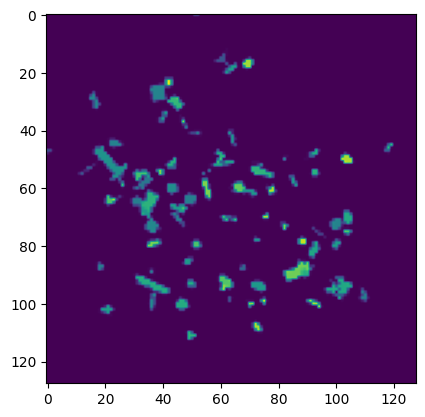

In [995]:
camera = pyredner.Camera(position = torch.tensor([.0, 5.0, .0]),
                      look_at = torch.tensor([0.0, 0.0, 0.0]),
                      up = torch.tensor([0.0, 0.0, 1.0]),
                      fov = torch.tensor([30.0]), # in degree
                      clip_near = 1e-2, # needs to > 0
                      resolution = (128, 128),
                      )
#camera = pyredner.automatic_camera_placement(objects, resolution=(512, 512))

scene = pyredner.Scene(camera = camera, objects = newObjects)

# objects is a list contains one or multiple pyredner.object
chan_list = [pyredner.channels.depth]

img = pyredner.render_generic(scene, chan_list)
print(img.shape)
# Visualize img
from matplotlib.pyplot import imshow
%matplotlib inline
# Need to gamma compress the image for displaying.
img = torch.pow(img, 2.5)
imshow(img.cpu())